# Netflix Movies and TV Shows: An Analysis. 
#### Recall: This is not an IMDB/TMDB database - it is data based on what is on Netflix USA as of May 2022.
* Goal 1: To visualise the most popular actors based on the IMDB ratings
* Goal 2: To visualise the most popular genres through the years
* Goal 3: To see if there is a relationship between runtime and ratings

_Note: Data from Kaggle.com - https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies_

In [1]:
# importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# importing the two datasets

credits = pd.read_csv('credits.csv')
title = pd.read_csv('titles.csv')

In [3]:
# merge the two datasets
df = pd.merge(credits, title)

In [4]:
# creating a new dataframe for Goal #1

imdb_name_df = df.groupby('name').agg({'imdb_score': ['mean', 'min', 'max']})
tmdb_name_df = df.groupby('name').agg({'tmdb_score': ['mean', 'min', 'max']})

In [5]:
# Confirming that this works, and manually calculating based on the data frame

print (imdb_name_df[imdb_name_df.index.str.startswith('Tom Hanks')])
print (tmdb_name_df[tmdb_name_df.index.str.startswith('Tom Hanks')])

          imdb_score          
                mean  min  max
name                          
Tom Hanks        7.7  6.7  8.8
          tmdb_score          
                mean  min  max
name                          
Tom Hanks        7.5  6.6  8.5


In [6]:
# Confirmed by manual counting

df.loc[df['name'] == 'Tom Hanks']

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1770,2718,tm122434,Tom Hanks,Forrest Gump,ACTOR,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],NaN,tt0109830,8.8,1994599.0,57.114,8.5
1882,2718,tm57554,Tom Hanks,Captain John H. Miller,ACTOR,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,"['drama', 'war']",['US'],NaN,tt0120815,8.6,1346020.0,54.874,8.2
2072,2718,tm56574,Tom Hanks,Joe Fox,ACTOR,You've Got Mail,MOVIE,"Book superstore magnate, Joe Fox and independe...",1998,PG,119,"['romance', 'drama', 'comedy']",['US'],NaN,tt0128853,6.7,209258.0,15.015,6.6
5535,2718,tm105329,Tom Hanks,Michael Sullivan,ACTOR,Road to Perdition,MOVIE,Mike Sullivan works as a hit man for crime bos...,2002,R,117,"['thriller', 'documentation', 'crime', 'drama']",['US'],NaN,tt0257044,7.7,263212.0,17.730,7.4
16146,2718,tm53625,Tom Hanks,Himself,ACTOR,Inventing David Geffen,MOVIE,"Notoriously press and camera-shy, David Geffen...",2012,NaN,120,['documentation'],[],NaN,NaN,NaN,NaN,2.015,7.8
37400,2718,tm427465,Tom Hanks,Self,ACTOR,Quincy,MOVIE,An intimate look into the life of icon Quincy ...,2018,NaN,124,"['music', 'documentation']",['US'],NaN,tt7440432,7.6,4488.0,7.629,7.4
54025,2718,tm981451,Tom Hanks,Self (archive footage),ACTOR,Death to 2020,MOVIE,2020: A year so [insert adjective of choice he...,2020,NaN,71,['comedy'],"['GB', 'US']",NaN,tt13567480,6.8,38301.0,12.812,6.6


In [7]:
imdb_name_df

imdb_score          
                          mean  min  max
name                                    
 Michael Hayden            6.9  6.9  6.9
'Jeeva' Ravi               7.7  7.7  7.7
'Weird Al' Yankovic        6.5  5.2  7.8
21 Savage                  4.3  4.3  4.3
2Mex                       6.3  6.3  6.3
...                        ...  ...  ...
정봉주                        8.6  8.6  8.6
조경이                        NaN  NaN  NaN
주둥닝                        8.0  8.0  8.0
지뢰                         7.4  7.4  7.4
허윤무                        8.6  8.6  8.6

[53687 rows x 3 columns]

In [8]:
# drop level for the column, resulting in no index

imdb_name_df.columns = imdb_name_df.columns.droplevel()
tmdb_name_df.columns = tmdb_name_df.columns.droplevel()

In [9]:
imdb_name_df

,mean,min,max
name,,,
Michael Hayden,6.9,6.9,6.9
'Jeeva' Ravi,7.7,7.7,7.7
'Weird Al' Yankovic,6.5,5.2,7.8
21 Savage,4.3,4.3,4.3
2Mex,6.3,6.3,6.3
...,...,...,...
정봉주,8.6,8.6,8.6
조경이,NaN,NaN,NaN
주둥닝,8.0,8.0,8.0


In [10]:
# sort values by descending order - we see that Anna Gunn is the star of Breaking Bad, and I do not think 

imdb_name_df.sort_values(by='mean', ascending=False, inplace=True)
tmdb_name_df.sort_values(by='mean', ascending=False, inplace=True)

imdb_name_df

,mean,min,max
name,,,
Anna Gunn,9.5,9.5,9.5
Betsy Brandt,9.5,9.5,9.5
Zach Tyler,9.3,9.3,9.3
Jessie Flower,9.3,9.3,9.3
Cricket Leigh,9.3,9.3,9.3
...,...,...,...
박소연,NaN,NaN,NaN
박지윤,NaN,NaN,NaN
이지현,NaN,NaN,NaN


## A minor issue

We see Anna Gunn is top. This might be because of Breaking Bad being the only show that she is on, on Netflix.

We may need to add a weight to names with higher frequency of how many times they are on the dataset in different movies or TV shows.

In [11]:
# Confirmed suspicions

df[df['name']=="Anna Gunn"]

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4566,37752,ts4,Anna Gunn,Skyler White,ACTOR,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'thriller', 'crime']",['US'],5.0,tt0903747,9.5,1727694.0,337.419,8.8


In [12]:
# Check how many films or TV shows Tom Hanks is in.

df[df['name']=="Tom Hanks"]

# We manually count 7.

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1770,2718,tm122434,Tom Hanks,Forrest Gump,ACTOR,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],NaN,tt0109830,8.8,1994599.0,57.114,8.5
1882,2718,tm57554,Tom Hanks,Captain John H. Miller,ACTOR,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,"['drama', 'war']",['US'],NaN,tt0120815,8.6,1346020.0,54.874,8.2
2072,2718,tm56574,Tom Hanks,Joe Fox,ACTOR,You've Got Mail,MOVIE,"Book superstore magnate, Joe Fox and independe...",1998,PG,119,"['romance', 'drama', 'comedy']",['US'],NaN,tt0128853,6.7,209258.0,15.015,6.6
5535,2718,tm105329,Tom Hanks,Michael Sullivan,ACTOR,Road to Perdition,MOVIE,Mike Sullivan works as a hit man for crime bos...,2002,R,117,"['thriller', 'documentation', 'crime', 'drama']",['US'],NaN,tt0257044,7.7,263212.0,17.730,7.4
16146,2718,tm53625,Tom Hanks,Himself,ACTOR,Inventing David Geffen,MOVIE,"Notoriously press and camera-shy, David Geffen...",2012,NaN,120,['documentation'],[],NaN,NaN,NaN,NaN,2.015,7.8
37400,2718,tm427465,Tom Hanks,Self,ACTOR,Quincy,MOVIE,An intimate look into the life of icon Quincy ...,2018,NaN,124,"['music', 'documentation']",['US'],NaN,tt7440432,7.6,4488.0,7.629,7.4
54025,2718,tm981451,Tom Hanks,Self (archive footage),ACTOR,Death to 2020,MOVIE,2020: A year so [insert adjective of choice he...,2020,NaN,71,['comedy'],"['GB', 'US']",NaN,tt13567480,6.8,38301.0,12.812,6.6


In [13]:
# This code chunk adds a column where the artists have a value attributed to how many times they participate in a 
# movie or TV show.

count_occ = pd.DataFrame(df.groupby('name').nunique())
count_occ.rename(columns={"id": "Count_of_Times_in_Media"}, inplace=True)
count_occ.sort_values(by='Count_of_Times_in_Media', ascending=False)
count_occ = count_occ['Count_of_Times_in_Media']

In [14]:
# This works!

count_occ.loc['Tom Hanks']

7

In [15]:
imdb_name_df

,mean,min,max
name,,,
Anna Gunn,9.5,9.5,9.5
Betsy Brandt,9.5,9.5,9.5
Zach Tyler,9.3,9.3,9.3
Jessie Flower,9.3,9.3,9.3
Cricket Leigh,9.3,9.3,9.3
...,...,...,...
박소연,NaN,NaN,NaN
박지윤,NaN,NaN,NaN
이지현,NaN,NaN,NaN


In [16]:
# Occurence count of names into a dataframe 
# Merge the two dataframes into one 

count_occ = pd.DataFrame(count_occ)
df_1a = pd.merge(count_occ, imdb_name_df, left_index=True, right_index=True)
df_1b = pd.merge(count_occ, tmdb_name_df, left_index=True, right_index=True)

In [17]:
df_1a.sort_values(by=['Count_of_Times_in_Media'])

,Count_of_Times_in_Media,mean,min,max
name,,,,
Michael Hayden,1,6.900000,6.9,6.9
Max Burkholder,1,5.800000,5.8,5.8
Max Cavenham,1,2.900000,2.9,2.9
Max Chernin,1,5.200000,5.2,5.2
Max Corvalán,1,6.300000,6.3,6.3
...,...,...,...,...
Paresh Rawal,22,6.409091,4.0,8.1
Kareena Kapoor Khan,25,6.312000,3.5,8.4
Anupam Kher,25,6.048000,3.6,8.1


## Accounting for actors with a low count of times in media

Now we have to come up with a formula that would add a higher weight to the mean if the
Count_of_times_in_Films is higher also. This will avoid the outlier cases such as Anna Gunn and give a better idea
of the actors who tend to be in better films, etc.

We reverse engineer adjusted R-squared to assign higher weights to higher frequencies. 
The formula we come up with is the following:

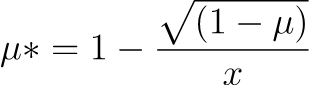

https://latex.codecogs.com/svg.image?\mu&space;*&space;=&space;1&space;-&space;\frac{\sqrt{(1-\mu)}}{x}

where: 
* μ* = Adjusted mean 
* μ  = Mean as on the dataframe `df_1a` divided by 10
* x  = Count of times in media

We can now create a new column with adjusted mean!

In [18]:
# We should see if the data types are correct before processing the dataframe 
# The below shows us that Count_of_Times_in_Media are integers. We can fix this by converting the series into floats

df_1a.dtypes

Count_of_Times_in_Media      int64
mean                       float64
min                        float64
max                        float64
dtype: object

In [19]:
df_1a["Count_of_Times_in_Media"] = pd.to_numeric(df_1a["Count_of_Times_in_Media"], downcast="float")
df_1a['Adjusted mean'] = 1-(np.sqrt(1-(df_1a["mean"]/10)) / df_1a["Count_of_Times_in_Media"])

# Charting 

Now that we have most of what we need, we will visualise our data.

In [ ]:
# plt.figure(figsize=(10,6))
# plt.bar(df_1a.index, 'Adjusted mean', data=df_1a.head(5))